This is formatting and aligning data from Copernicus EMS data: https://rapidmapping.emergency.copernicus.eu/

In [1]:
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import yaml
from rasterio.crs import CRS
import pandas as pd

In [2]:
yaml_file = '../events/chiapas_fire_2024.yml' #'porto_algre.yml'
with open(yaml_file) as f:
    event_dict = yaml.safe_load(f)["event"]
event_dict

{'event_name': 'chiapas_fire_2024',
 'bounds': [-67.46539879, -15.15161343, -66.99244587, -14.32687002],
 'event_date': '2024-03-28',
 'pre_event_window_days': 100,
 'post_event_window_days': 60,
 'rtc_track_numbers': [7],
 'mgrs_tiles': ['19LFE', '19LFD', '19LGE', '19LGD'],
 'dist_hls_confirmed_change_min_days': 30,
 'source_id': 'Copernicus EMSR717',
 'links': ['data: https://rapidmapping.emergency.copernicus.eu/EMSR717',
  'https://earthobservatory.nasa.gov/images/152628/fire-in-southern-mexico',
  'etin-171-copernicus-emergency-management-service-monitors-wildfires-mexico']}

In [3]:
df_0 = gpd.read_file('../external_validation_data/copernicus_ems/chiapas_fire_2024/EMSR717_AOI01_DEL_MONIT09_v1/EMSR717_AOI01_DEL_MONIT09_observedEventA_v1.shp')
df_0.head()

,event_type,obj_desc,det_method,notation,dmg_src_id,area,geometry
0,8-Wildfire,Forest Fire,Semi-automatic extraction,Burnt area,12,1.882959,"POLYGON ((-94.07344 16.72603, -94.07344 16.725..."
1,8-Wildfire,Forest Fire,Semi-automatic extraction,Burnt area,12,0.128725,"POLYGON ((-94.07052 16.72635, -94.07053 16.726..."
2,8-Wildfire,Forest Fire,Semi-automatic extraction,Burnt area,12,0.156518,"POLYGON ((-94.09135 16.72868, -94.09135 16.728..."
3,8-Wildfire,Forest Fire,Semi-automatic extraction,Burnt area,12,0.127719,"POLYGON ((-94.09103 16.73047, -94.09103 16.730..."
4,8-Wildfire,Forest Fire,Semi-automatic extraction,Burnt area,12,0.141164,"POLYGON ((-94.07686 16.73055, -94.07689 16.730..."


In [4]:
df_1 = gpd.read_file('../external_validation_data/copernicus_ems/chiapas_fire_2024/EMSR717_AOI02_DEL_MONIT10_v2/EMSR717_AOI02_DEL_MONIT10_observedEventA_v2.shp')
df_1.head()

,event_type,obj_desc,det_method,notation,dmg_src_id,area,geometry
0,8-Wildfire,Forest Fire,Photo-interpretation,Burnt area,17,2.870398,"POLYGON ((-94.36531 16.41084, -94.36547 16.410..."
1,8-Wildfire,Forest Fire,Photo-interpretation,Burnt area,17,28.328587,"POLYGON ((-94.43798 16.42083, -94.43796 16.420..."
2,8-Wildfire,Forest Fire,Photo-interpretation,Burnt area,17,15.095285,"POLYGON ((-94.45334 16.43132, -94.45342 16.430..."
3,8-Wildfire,Forest Fire,Photo-interpretation,Burnt area,17,1321.109468,"POLYGON ((-94.39105 16.43605, -94.39095 16.435..."
4,8-Wildfire,Forest Fire,Photo-interpretation,Burnt area,17,18.868064,"POLYGON ((-94.36291 16.46024, -94.36276 16.460..."


<Axes: >

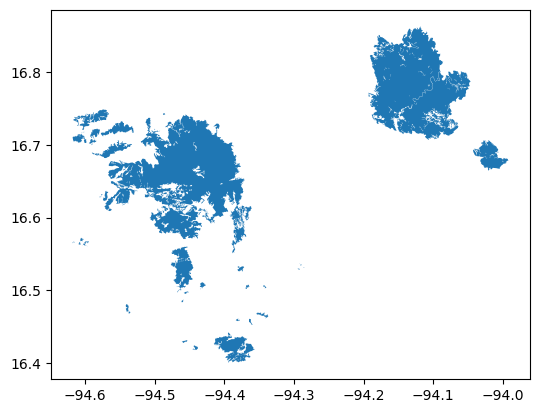

In [5]:
df_event = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)
df_event.plot()

In [7]:
df_event.total_bounds

array([-94.61821887,  16.40055876, -93.99189954,  16.86321617])

In [8]:
geo = df_event.geometry.unary_union

df_event_f = gpd.GeoDataFrame({'name': [event_dict['event_name']],
                               'date': [pd.to_datetime(event_dict['event_date'])],
                               'source_id': [f'Copernicus {event_dict["source_id"]}']},
                              geometry=[geo],
                              crs=CRS.from_epsg(4326))
df_event_f.head()

,name,date,source_id,geometry
0,chiapas_fire_2024,2024-03-28,Copernicus Copernicus EMSR717,"MULTIPOLYGON (((-94.53755 16.46818, -94.53770 ..."


In [9]:
EXTERNAL_VAL_DATA_DIR = Path('../external_validation_data_db/')
EXTERNAL_VAL_DATA_DIR.mkdir(exist_ok=True, parents=True)

In [10]:
df_event_f.to_file(EXTERNAL_VAL_DATA_DIR / f'{event_dict["event_name"]}.geojson', driver='GeoJSON')